# Python Group Project: Preparing a Dataset for Regression Analysis

### Group Members: Vedant Mayor (100345949), Roberta Bukowski (100342032), Nikita Batra (100340487), Harshad Subhash (100345115)

##### The aim of this project is to prepare the Ames Housing Prices Dataset for use by a Reasearch Team to determine the effect of various factors on the Sale Price of a House in Ames, Iowa using a Multiple Linear Regression Model.

### Objectives:
##### a) Read and Understand the Dataset Structure
##### b) Transform/Reshape the Dataset as needed
##### c) Remove any Missing/Null Values from the Dataset
##### d) Remove Outliers from the DataSet
##### e) Statistically Describe the Dataset
##### f) Appropriately Restructure Categorical Variables for Regression Analysis

### Reading and Importing Datasets

In [1]:
# To import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv
%matplotlib inline

#Define Text Styles
b = '\033[1m'
u = '\033[4m'
n = '\033[0m'

# To supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To read both sheets of the Dataset as different DataFrames
xlsx = pd.ExcelFile('house_sales.xlsx')
df_sale = pd.read_excel(xlsx, sheet_name='sale')
df_ext = pd.read_excel(xlsx, sheet_name='exterior')
df_int = pd.read_excel(xlsx, sheet_name='interior')

In [3]:
# To set display options to show all columns
pd.set_option('display.max_columns', None)

# To display First 10 Rows of all DataFrames
print(f'{b}{u}DataFrame: Exterior{n}')
display(df_ext.head(10))
print(f'{b}{u}\n\nDataFrame: Interior{n}')
display(df_int.head(10))
print(f'{b}{u}\n\nDataFrame: Sale{n}')
display(df_sale.head(10))

DataFrame: Exterior


,Id,MS_Sub_Class,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Y,0,61,0,0,0,0,NaN,NaN,NaN,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Y,298,0,0,0,0,0,NaN,NaN,NaN,0
2,3,60,RL,68.0,11250,Pave,NaN,-,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Y,0,42,0,0,0,0,NaN,NaN,NaN,0
3,4,70,RL,60.0,9550,Pave,NaN,-,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,Y,0,35,272,0,0,0,NaN,NaN,NaN,0
4,5,60,RL,84.0,14260,Pave,NaN,-,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Y,192,84,0,0,0,0,NaN,NaN,NaN,0
5,6,50,RL,85.0,14115,Pave,NaN,-,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700
6,7,20,RL,75.0,10084,Pave,NaN,-,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Y,255,57,0,0,0,0,NaN,NaN,NaN,0
7,8,60,RL,NaN,10382,Pave,NaN,-,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Y,235,204,228,0,0,0,NaN,NaN,Shed,350
8,9,50,RM,51.0,6120,Pave,NaN,-,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,Y,90,0,205,0,0,0,NaN,NaN,NaN,0
9,10,190,RL,50.0,7420,Pave,NaN,-,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Y,0,4,0,0,0,0,NaN,NaN,NaN,0




DataFrame: Interior


,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,1,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA
1,2,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA
2,3,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA
3,4,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA
4,5,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA
5,6,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA
6,7,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA
7,8,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA
8,9,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA
9,10,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA




DataFrame: Sale


,Id,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2,2008,WD,Normal,208500.0
1,2,5,2007,WD,Normal,181500.0
2,3,9,2008,WD,Normal,223500.0
3,4,2,2006,WD,Abnorml,140000.0
4,5,12,2008,WD,Normal,250000.0
5,6,10,2009,WD,Normal,143000.0
6,7,8,2007,WD,Normal,307000.0
7,8,11,2009,WD,Normal,200000.0
8,9,4,2008,WD,Abnorml,129900.0
9,10,1,2008,WD,Normal,118000.0


### Understanding Structure of Datasets and Transforming as Needed

In [4]:
# To understand the structure of all DataFrames
print(f'''{b}{u}Shape of Exterior DataFrame{n}:
Number of Rows = {df_ext.shape[0]} | Number of Columns = {df_ext.shape[1]}''')
print(f'''{b}{u}\nShape of Interior DataFrame{n}:
Number of Rows = {df_int.shape[0]} | Number of Columns = {df_int.shape[1]}''')
print(f'''{b}{u}\nShape of Sale DataFrame{n}:
Number of Rows = {df_sale.shape[0]} | Number of Columns = {df_sale.shape[1]}''')

Shape of Exterior DataFrame:
Number of Rows = 1460 | Number of Columns = 41

Shape of Interior DataFrame:
Number of Rows = 1444 | Number of Columns = 36

Shape of Sale DataFrame:
Number of Rows = 1460 | Number of Columns = 6


In [5]:
# To get a list of column names of both DataFrames
print(f'''{b}{u}Columns in Exterior DataFrame{n}:
{df_ext.columns.values}''')
print(f'''{b}{u}\nColumns in Interior DataFrame{n}:
{df_int.columns.values}''')
print(f'''{b}{u}\nColumns in Sale DataFrame{n}:
{df_sale.columns.values}''')

Columns in Exterior DataFrame:
['Id' 'MS_Sub_Class' 'MS_Zoning' 'Lot_Frontage' 'Lot_Area' 'Street'
 'Alley' 'Lot_Shape' 'Land_Contour' 'Utilities' 'Lot_Config' 'Land_Slope'
 'Neighborhood' 'Condition_1' 'Condition_2' 'Bldg_Type' 'House_Style'
 'Overall_Qual' 'Overall_Cond' 'Year_Built' 'Year_Remod_Add' 'Roof_Style'
 'Roof_Matl' 'Exterior_1st' 'Exterior_2nd' 'Mas_Vnr_Type' 'Mas_Vnr_Area'
 'Exter_Qual' 'Exter_Cond' 'Foundation' 'PavedDrive' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal']

Columns in Interior DataFrame:
['Id' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'Heating'
 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageYrB

In [6]:
# To clean column names in Exterior DataFrame
df_ext.columns = df_ext.columns.str.strip().str.replace('_','')
print(f'''{b}{u}Columns in Exterior DataFrame{n}:
{df_ext.columns.values}''')

Columns in Exterior DataFrame:
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'PavedDrive' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal']


In [7]:
# To create subsets of DataFrames with only the required variables
df_ext_sub = df_ext[['Id','LotArea','LotShape','Utilities','BldgType','YearBuilt','Foundation']]
df_int_sub = df_int[['Id','TotalBsmtSF','GrLivArea','FullBath','BedroomAbvGr',
                     'KitchenAbvGr','TotRmsAbvGrd','GarageArea']]
df_sale_sub = df_sale[['Id','YrSold','SalePrice']]

In [8]:
# To display first 3 rows and shape of the subsets
print(f'{b}{u}DataFrame Subset: Exterior{n} {df_ext_sub.shape}')
display(df_ext_sub.head(3))
print(f'{b}{u}\n\nDataFrame Subset: Interior{n} {df_int_sub.shape}')
display(df_int_sub.head(3))
print(f'{b}{u}\n\nDataFrame Subset: Sale{n} {df_sale_sub.shape}')
display(df_sale_sub.head(3))

DataFrame Subset: Exterior (1460, 7)


,Id,LotArea,LotShape,Utilities,BldgType,YearBuilt,Foundation
0,1,8450,Reg,AllPub,1Fam,2003,PConc
1,2,9600,Reg,AllPub,1Fam,1976,CBlock
2,3,11250,-,AllPub,1Fam,2001,PConc




DataFrame Subset: Interior (1444, 8)


,Id,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea
0,1,856,1710,2,3,1,8,548
1,2,1262,1262,2,3,1,6,460
2,3,920,1786,2,3,1,6,608




DataFrame Subset: Sale (1460, 3)


,Id,YrSold,SalePrice
0,1,2008,208500.0
1,2,2007,181500.0
2,3,2008,223500.0


###  Removing Duplicate/Null Values | Merging Subsets to Form a Comprehensive Dataset

In [9]:
# To check for duplicates in DataFrames before Joining
print(f'{b}Number of Duplicates in Exterior DataFrame Subset{n} = {df_ext_sub.duplicated().sum()}')
print(f'{b}Number of Duplicates in Interior DataFrame Subset{n} = {df_int_sub.duplicated().sum()}')
print(f'{b}Number of Duplicates in Sale DataFrame Subset{n} = {df_sale_sub.duplicated().sum()}')

Number of Duplicates in Exterior DataFrame Subset = 0
Number of Duplicates in Interior DataFrame Subset = 3
Number of Duplicates in Sale DataFrame Subset = 0


In [10]:
# To view the duplicate rows and drop the duplicates from Interior DataFrame Subset
print(f'{b}{u}Duplicate Rows in Interior DataFrame{n}:')
display(df_int_sub[df_int_sub.duplicated()])

Duplicate Rows in Interior DataFrame:


,Id,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea
40,40,0,1152,2,2,2,6,0
75,84,1065,1065,1,3,1,6,461
287,304,894,894,1,3,1,5,552


In [11]:
# To remove the duplicate rows shown above
df_int_sub.drop_duplicates(inplace=True, keep='first')

In [12]:
# To verify that the duplicates were removed as expected
print(f'{b}Number of Duplicates in Interior DataFrame Subset{n} = {df_int_sub.duplicated().sum()}')
print(f'Number of Rows = {df_int_sub.shape[0]} | Number of Columns = {df_int_sub.shape[1]}')

Number of Duplicates in Interior DataFrame Subset = 0
Number of Rows = 1441 | Number of Columns = 8


In [13]:
# To get a list of possible key columns for joining (common columns in all 3 subset dataframes)
from functools import reduce
key_cols = list(reduce(np.intersect1d, (df_ext_sub.columns.values, df_int_sub.columns.values, df_sale_sub.columns.values)))
print(f'{b}Possible Merge Columns{n} = {key_cols}')

Possible Merge Columns = ['Id']


In [14]:
# To check for duplicates in key column Id
print(f'{b}Number of Duplicates in Id Column in Exterior DataFrame Subset{n} = {df_ext_sub["Id"].duplicated().sum()}')
print(f'{b}Number of Duplicates in Id Column in Interior DataFrame Subset{n} = {df_int_sub["Id"].duplicated().sum()}')
print(f'{b}Number of Duplicates in Id Column in Sale DataFrame Subset{n} = {df_sale_sub["Id"].duplicated().sum()}')

Number of Duplicates in Id Column in Exterior DataFrame Subset = 0
Number of Duplicates in Id Column in Interior DataFrame Subset = 0
Number of Duplicates in Id Column in Sale DataFrame Subset = 0


In [15]:
# To Join Sale, Exterior and Interior DataFrame Subsets to form a Compiled Dataset
df_merged = df_sale_sub.merge(df_ext_sub.merge(df_int_sub, on='Id', how='inner', left_index=True, right_index=True),
                              on='Id', how='inner', left_index=True, right_index=True)

# To display the merged dataframe and it's shape
print(f'''{b}{u}Merged DataFrame{n}:
Rows = {len(df_merged)} | Columns = {len(df_merged.columns)}''')
display(df_merged.head(5))

Merged DataFrame:
Rows = 1441 | Columns = 16


,Id,YrSold,SalePrice,LotArea,LotShape,Utilities,BldgType,YearBuilt,Foundation,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea
0,1,2008,208500.0,8450,Reg,AllPub,1Fam,2003,PConc,856,1710,2,3,1,8,548
1,2,2007,181500.0,9600,Reg,AllPub,1Fam,1976,CBlock,1262,1262,2,3,1,6,460
2,3,2008,223500.0,11250,-,AllPub,1Fam,2001,PConc,920,1786,2,3,1,6,608
3,4,2006,140000.0,9550,-,AllPub,1Fam,1915,BrkTil,756,1717,1,3,1,7,642
4,5,2008,250000.0,14260,-,AllPub,1Fam,2000,PConc,1145,2198,2,4,1,9,836


In [16]:
# To verify that all columns were merged properly
print(f'{b}Number of Columns in Merged DataFrame are equal to the Sum of Number of Columns in Subset DataFrames{n}: {str(len(df_merged.columns)) == str(len(df_ext_sub.columns)+len(df_int_sub.columns)+len(df_sale_sub.columns)-2)}')

Number of Columns in Merged DataFrame are equal to the Sum of Number of Columns in Subset DataFrames: True


In [17]:
# To check for Duplicates in the Merged DataFrame
print(f'{b}Number of Duplicates in Merged DataFrame{n} = {df_merged.duplicated().sum()}')

Number of Duplicates in Merged DataFrame = 0


In [18]:
# To check for Null Values in the DataFrame
print(f'{b}Null Values in Merged DataFrame{n}:')
print(df_merged.isnull().sum())

Null Values in Merged DataFrame:
Id               0
YrSold           0
SalePrice       23
LotArea          0
LotShape         0
Utilities        0
BldgType         0
YearBuilt        0
Foundation       0
TotalBsmtSF      0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageArea       0
dtype: int64


In [19]:
# To drop null values
df_merged.dropna(axis=0, how='any', inplace=True)

In [20]:
# To get Columns Datatypes
print(f'''{b}Column Datatypes{n}:
{df_merged.dtypes}''')

Column Datatypes:
Id                int64
YrSold            int64
SalePrice       float64
LotArea           int64
LotShape         object
Utilities        object
BldgType         object
YearBuilt         int64
Foundation       object
TotalBsmtSF       int64
GrLivArea         int64
FullBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
GarageArea        int64
dtype: object


In [21]:
# To find missing values in columns with datatype object
print(f'{b}{u}Unique Values in Object Type Columns{n}:')
for i in df_merged.select_dtypes(exclude=np.number).columns:
    print(f'{b}{i}{n}: {df_merged[i].unique()}')

Unique Values in Object Type Columns:
LotShape: ['Reg' '-' 'IR1' 'IR2' 'IR3']
Utilities: ['AllPub' 'NoSeWa']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Foundation: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


In [22]:
# To replace values with more appropriate values and define null values
df_merged.replace({'-':np.nan, 'TwnhsE':'Townhouse', 'Twnhs':'Townhouse',
                   '1Fam':'Studio', '2fmCon':'Condo', 'PConc':'Concrete'},
                  value=None, inplace=True)

In [23]:
# To verify that the missing values were replaced as expected
print(f'{b}{u}Unique Values in Object Type Columns{n}:')
for i in df_merged.select_dtypes(exclude=np.number).columns:
    print(f'{b}{i}{n}: {df_merged[i].unique()}')

Unique Values in Object Type Columns:
LotShape: ['Reg' nan 'IR1' 'IR2' 'IR3']
Utilities: ['AllPub' 'NoSeWa']
BldgType: ['Studio' 'Condo' 'Duplex' 'Townhouse']
Foundation: ['Concrete' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


In [24]:
# To remove null values after defining missing values as NaNs and verify
df_merged.dropna(axis=0, how='any', inplace=True)
print(f'{b}Null Values in Merged DataFrame{n}:')
print(df_merged.isnull().sum())
print(f'''\n{b}Shape of DataFrame after Removing Null Values{n}:
Rows = {df_merged.shape[0]} | Columns = {df_merged.shape[1]}''')

Null Values in Merged DataFrame:
Id              0
YrSold          0
SalePrice       0
LotArea         0
LotShape        0
Utilities       0
BldgType        0
YearBuilt       0
Foundation      0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
dtype: int64

Shape of DataFrame after Removing Null Values:
Rows = 1381 | Columns = 16


### Descriptive Statistics and Removal of Outliers

In [25]:
# To get Descriptive Stats for Numerical Columns in the Final DataFrame
num_stats = df_merged.describe().transpose()
print(f'{b}{u}Descriptive Statisics for Numerical Columns{n}:')
num_stats.reset_index(inplace=True)
num_stats.rename(columns={'index':'Column'}, inplace=True)
num_stats.columns = num_stats.columns.str.title()    
display(num_stats.style.hide_index())

Descriptive Statisics for Numerical Columns:


Column,Count,Mean,Std,Min,25%,50%,75%,Max
Id,1381,723.398,416.175,1,357,741,1086,1444
YrSold,1381,2007.83,1.32996,2006,2007,2008,2009,2010
SalePrice,1381,180597,78499.8,34900,129500,163000,214000,745000
LotArea,1381,10495.3,10153.9,1300,7535,9430,11512,215245
YearBuilt,1381,1970.98,30.4328,1872,1953,1972,2000,2010
TotalBsmtSF,1381,1054.18,440.865,0,793,991,1286,6110
GrLivArea,1381,1516.34,528.08,334,1131,1459,1776,5642
FullBath,1381,1.56408,0.550085,0,1,2,2,3
BedroomAbvGr,1381,2.87907,0.807934,0,2,3,3,8
KitchenAbvGr,1381,1.04345,0.210921,0,1,1,1,3


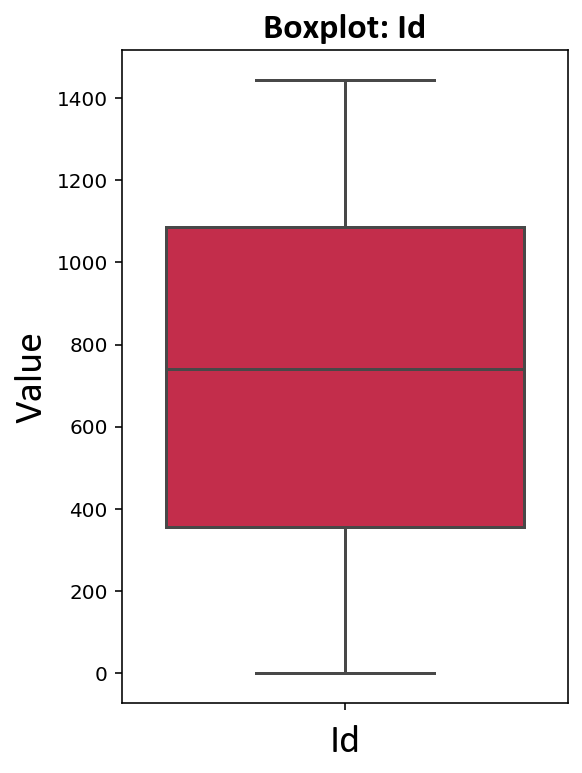

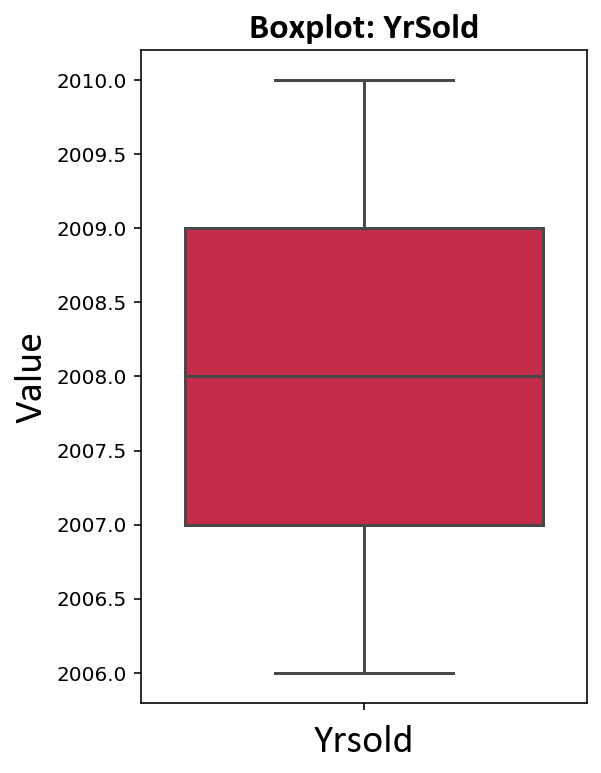

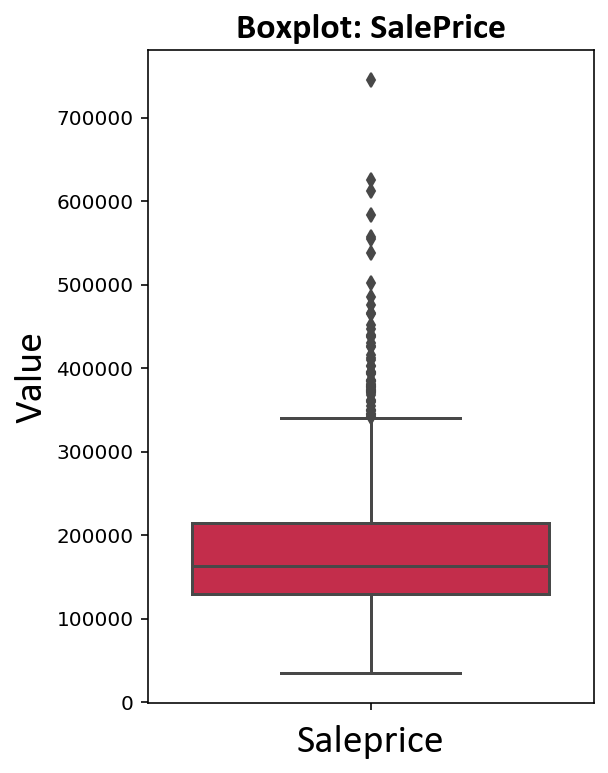

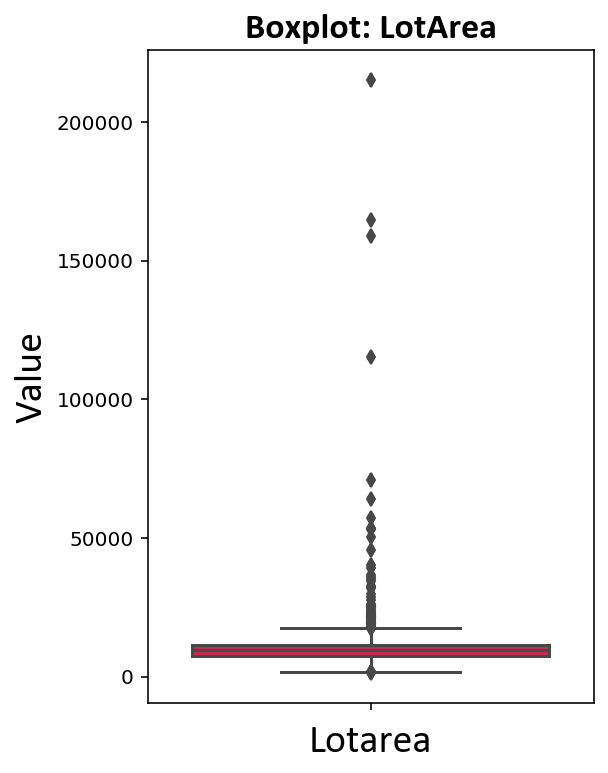

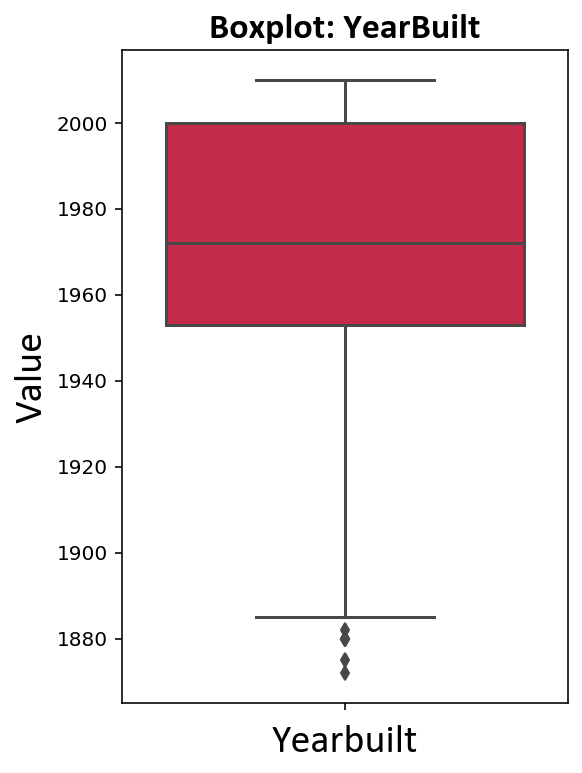

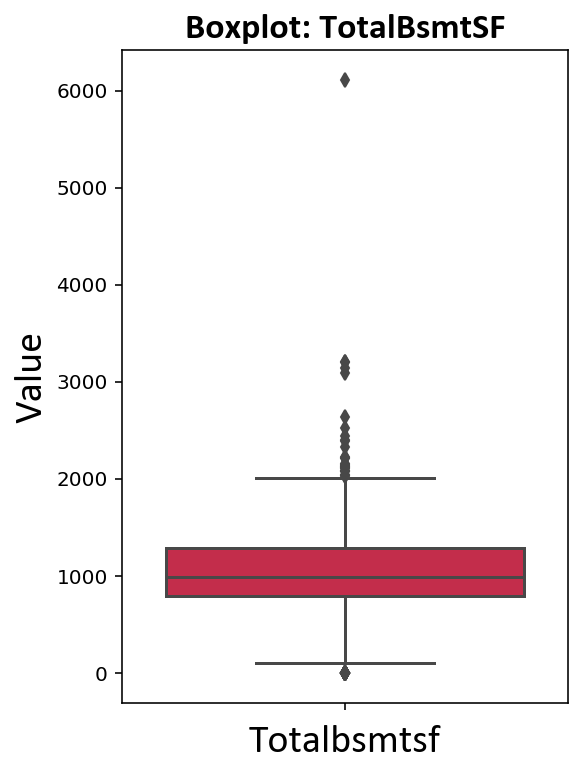

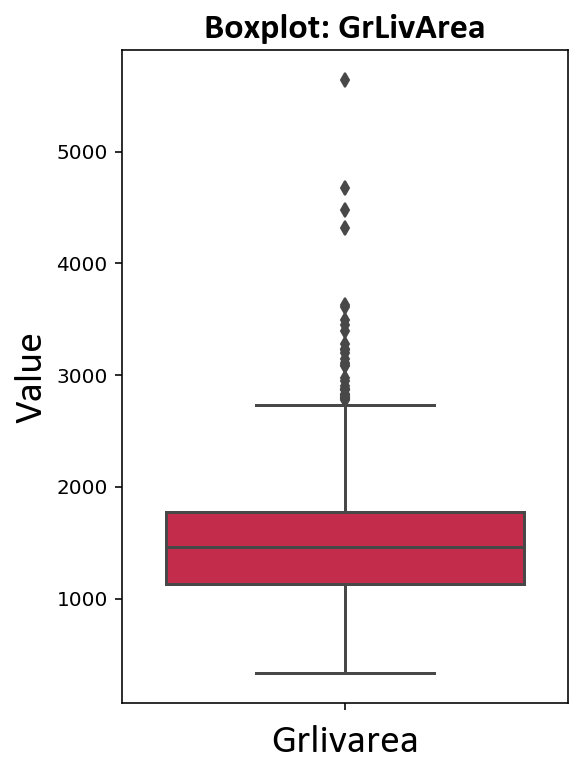

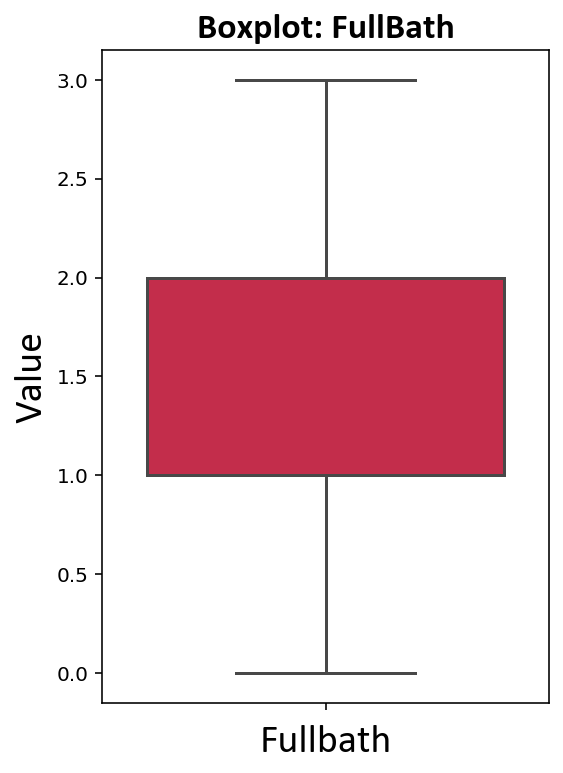

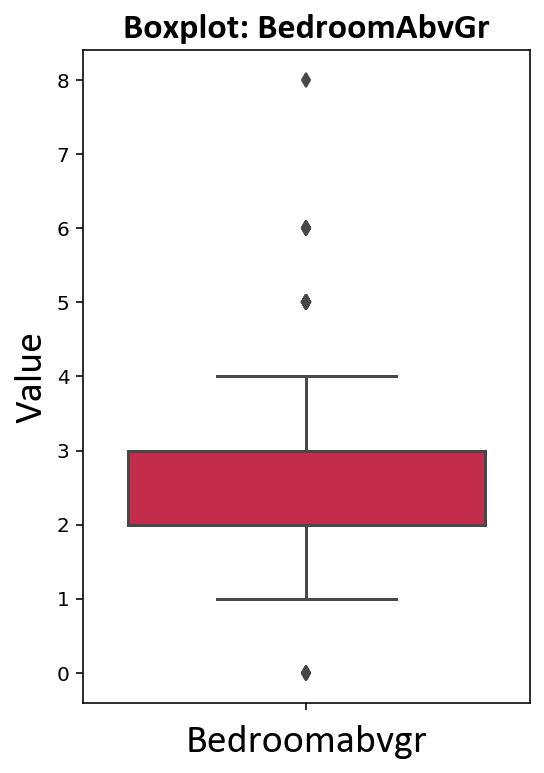

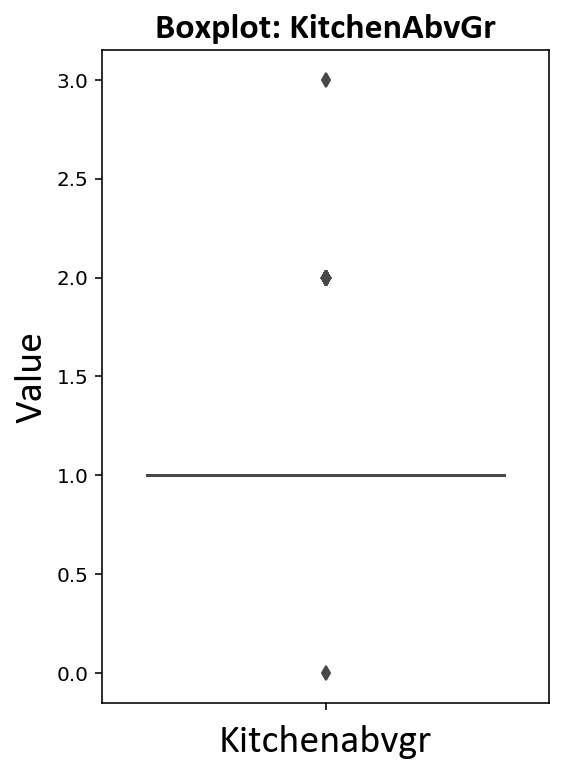

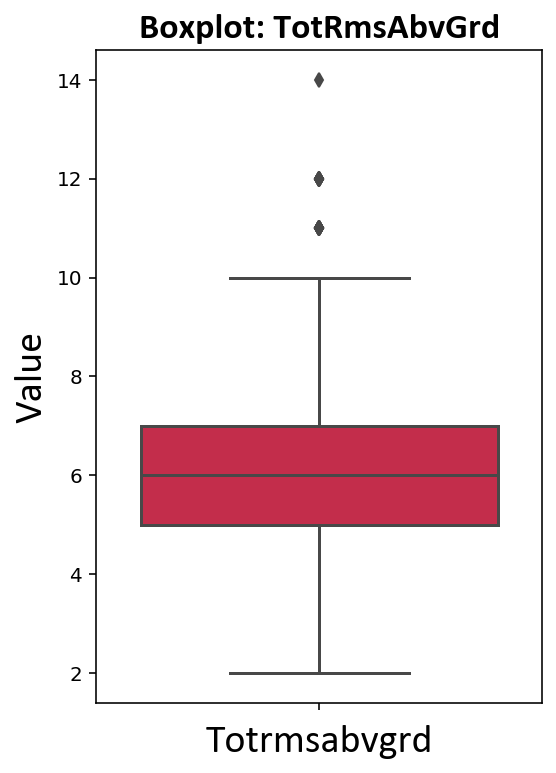

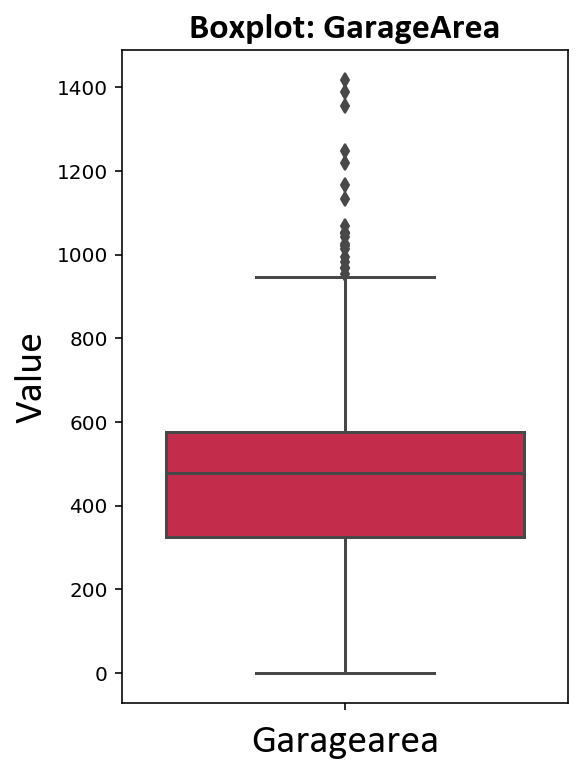

In [26]:
# To identify outliers in numerical columns using visuals
%config InlineBackend.figure_format = 'retina'
for i in df_merged.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(4,6))
    sns.boxplot(None, df_merged[i], color='crimson')
    plt.xlabel(i.title(), fontname='Calibri', fontsize=20)
    plt.ylabel('Value', fontname='Calibri', fontsize=20)
    plt.suptitle('')
    plt.title(f'Boxplot: {i}', fontname='Calibri', fontsize=18, fontweight='bold')
    plt.tick_params(axis='x', labelsize=15)
    plt.show()

In [27]:
# Calculate z-scores and remove outliers from numerical columns
from scipy import stats
df_no_out = df_merged.copy()
for i in df_no_out.select_dtypes(include=np.number).columns:
    df_no_out = df_no_out[(stats.zscore(df_no_out[i]) >= -3) & (stats.zscore(df_no_out[i]) <= 3)]
print(f'{b}Shape of DataFrame (With Outliers){n} = {df_merged.shape}')
print(f'{b}Shape of DataFrame (Without Outliers){n} = {df_no_out.shape}')
print(f'\n{b}Number of Outliers removed{n} = {len(df_merged) - len(df_no_out)}')

Shape of DataFrame (With Outliers) = (1381, 16)
Shape of DataFrame (Without Outliers) = (1246, 16)

Number of Outliers removed = 135


In [28]:
# To display Descriptive Statistics for Numerical Columns after removal of outliers
num_stats_no_out = df_no_out.describe().transpose()
print(f'{b}{u}Descriptive Statisics for Numerical Columns (after removing outliers){n}:')
num_stats_no_out.reset_index(inplace=True)
num_stats_no_out.rename(columns={'index':'Column'}, inplace=True)
num_stats_no_out.columns = num_stats_no_out.columns.str.title()    
display(num_stats_no_out.style.hide_index())

# To check if removal of outliers changed Descriptive Statistics for Numerical Columns
print(f'\n{b}Descriptive Stats with and without Outliers are same{n}: {num_stats.equals(num_stats_no_out)}')

Descriptive Statisics for Numerical Columns (after removing outliers):


Column,Count,Mean,Std,Min,25%,50%,75%,Max
Id,1246,720.591,416.84,1,353.25,736.5,1083.75,1444
YrSold,1246,2007.81,1.32532,2006,2007,2008,2009,2010
SalePrice,1246,174635,66576.2,34900,129000,160100,207000,415298
LotArea,1246,9734.39,4264.34,1300,7544.5,9350,11361.8,40094
YearBuilt,1246,1970.56,30.1798,1880,1953,1972,2000,2010
TotalBsmtSF,1246,1034.93,372.702,0,794.25,982.5,1257.75,2223
GrLivArea,1246,1466.04,452.386,334,1117.25,1432,1727.5,2945
FullBath,1246,1.52648,0.523063,0,1,2,2,3
BedroomAbvGr,1246,2.82986,0.714693,1,2,3,3,5
KitchenAbvGr,1246,1,0,1,1,1,1,1



Descriptive Stats with and without Outliers are same: False


__Therefore, removing the outliers did make a difference to the descriptive statistics of the dataset.__

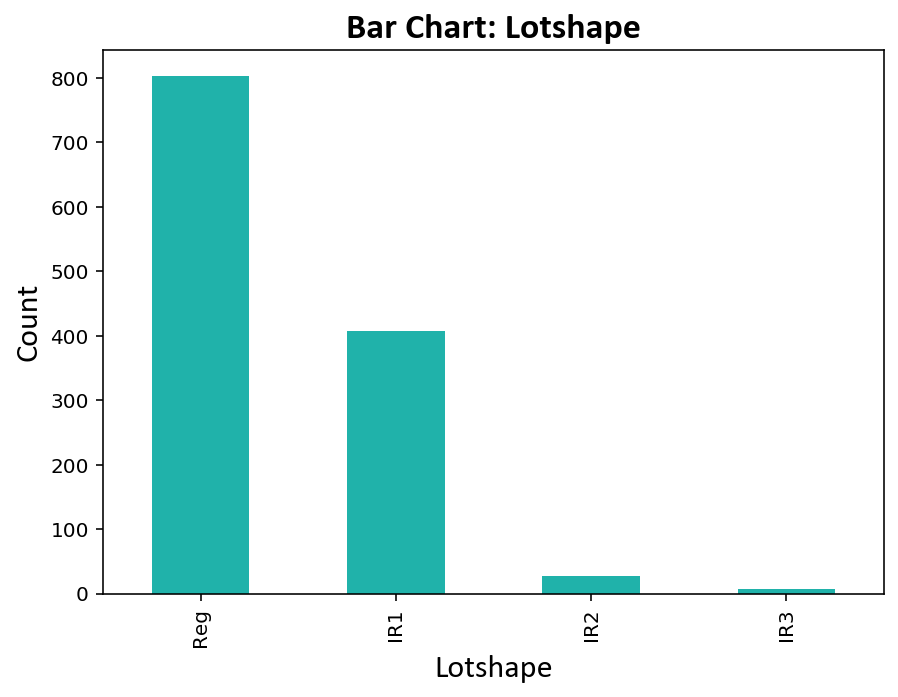

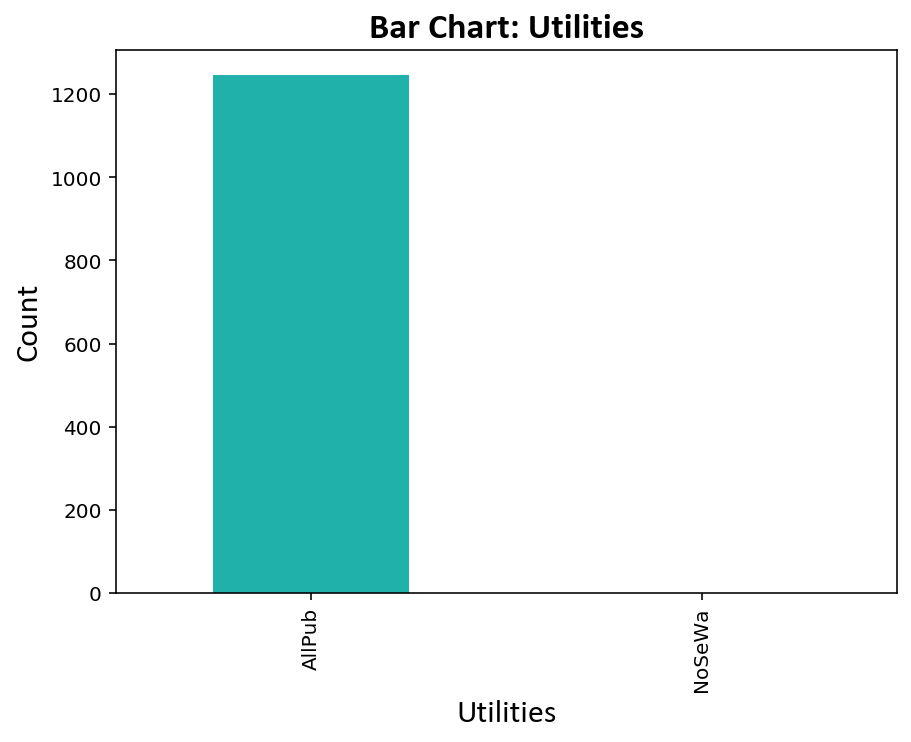

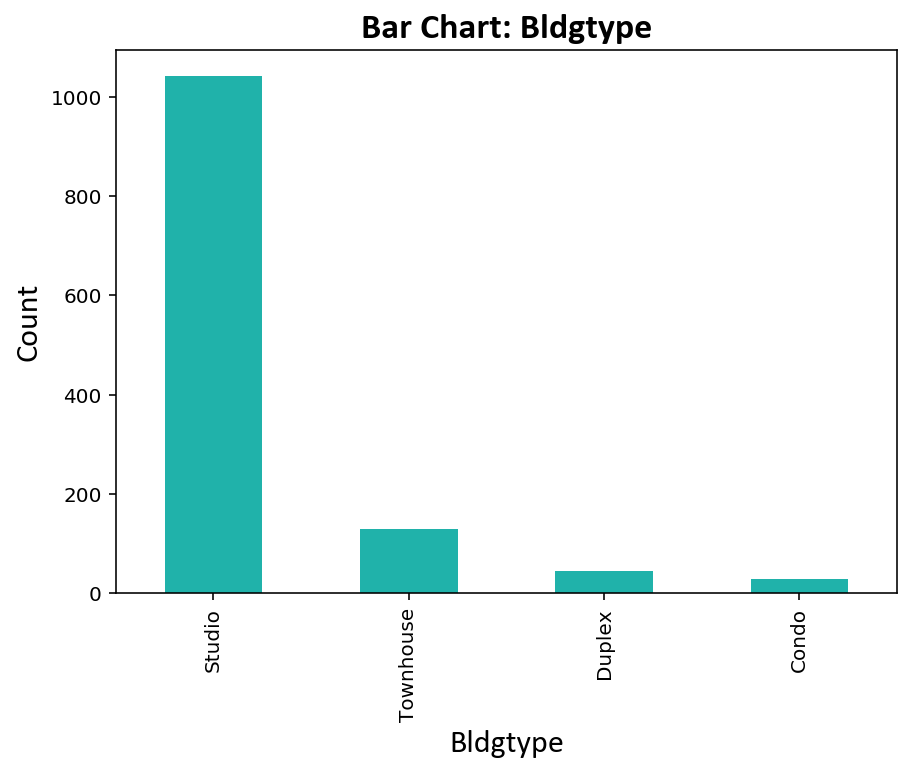

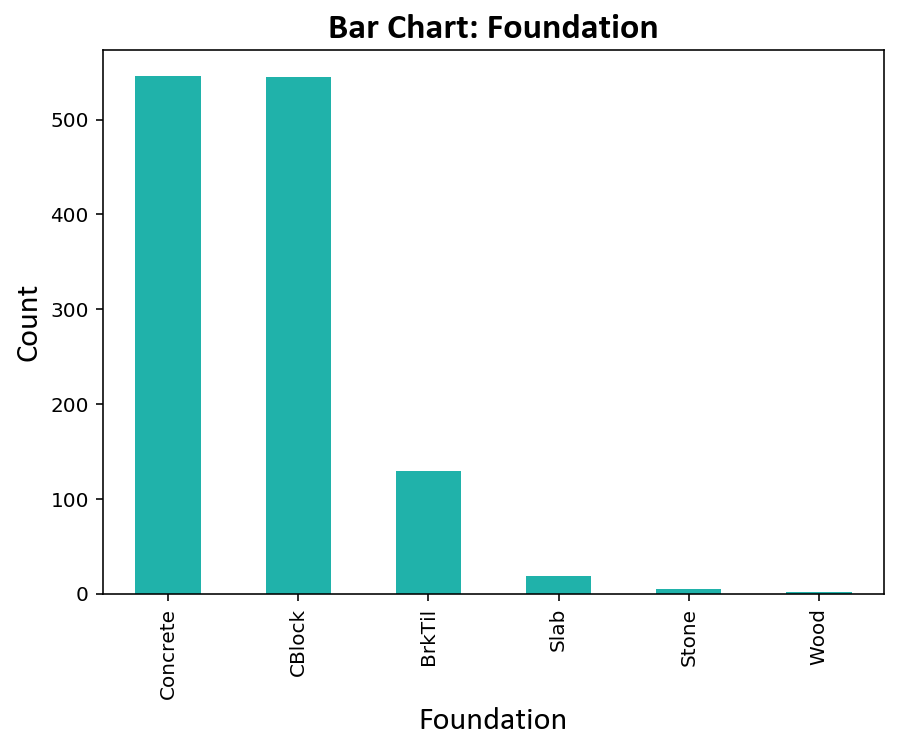

In [29]:
# To identify outliers in object type columns using visuals
%config InlineBackend.figure_format = 'retina'
for i in df_no_out.select_dtypes(exclude=np.number).columns:
    plt.figure(figsize=(7,5))
    df_no_out[i].value_counts().plot(kind='bar', color='lightseagreen')
    plt.xlabel(i.title(), fontname='Calibri', fontsize=16)
    plt.ylabel('Count', fontname='Calibri', fontsize=16)
    plt.title(f'Bar Chart: {i.title()}', fontname='Calibri', fontsize=18, fontweight='bold')
    plt.show()

In [30]:
# To remove outliers from Categorical Columns using Boolean Filtering
df_final = df_no_out[(df_no_out['LotShape']!='IR3')&
                    (df_no_out['Foundation']!='Wood')&
                    (df_no_out['Utilities']!='NoSeWa')]

In [31]:
# To get the number of outliers removed from object type columns
print(f'{b}Shape of DataFrame (With Outliers in Object Columns){n} = {df_no_out.shape}')
print(f'{b}Shape of DataFrame (Without Outliers in Object Columns){n} = {df_final.shape}')
print(f'\n{b}Number of Additional Outliers removed {n} = {len(df_no_out) - len(df_final)}')

Shape of DataFrame (With Outliers in Object Columns) = (1246, 16)
Shape of DataFrame (Without Outliers in Object Columns) = (1236, 16)

Number of Additional Outliers removed  = 10


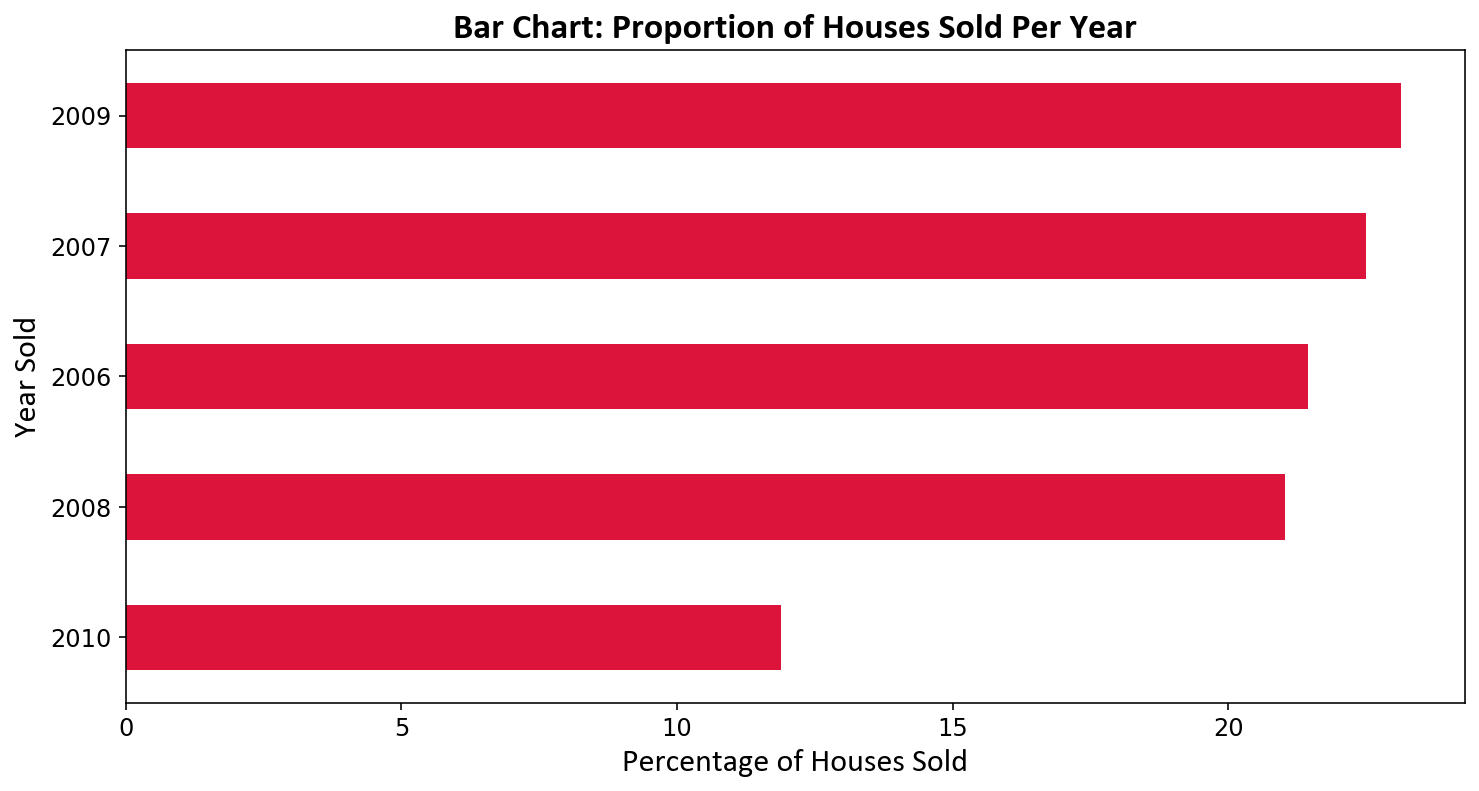

In [32]:
# To get the Number of Houses Sold per Year using groupby
house_per_year = df_final.groupby('YrSold')['Id'].count()

# To visualize the number of houses sold per year as a percentage of total houses sold
%config InlineBackend.figure_format = 'retina'
percent_house = ((house_per_year/house_per_year.sum())*100)
plt.figure(figsize=(12,6))
percent_house.sort_values(ascending=True).plot(kind='barh', color='crimson')
plt.xlabel('Percentage of Houses Sold', fontname='Calibri', fontsize=16)
plt.ylabel('Year Sold', fontname='Calibri', fontsize=16)
plt.title(f'Bar Chart: Proportion of Houses Sold Per Year', fontname='Calibri', fontsize=18, fontweight='bold')
plt.tick_params('both', labelsize=12)
plt.show()

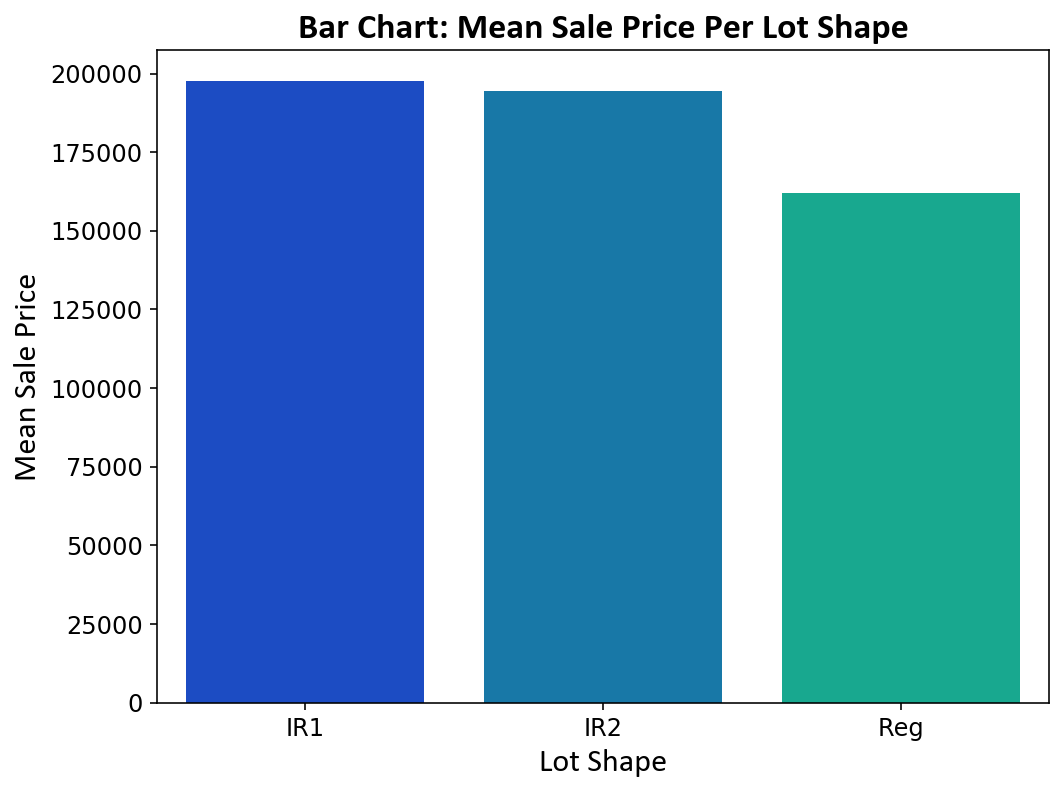

In [33]:
# To get the Mean Sale Price for different Lot Shapes
lot_shape_price = df_final.groupby('LotShape')['SalePrice'].mean()

# To visualize the above information as a Pie Chart
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(8,6))
sns.barplot(x=lot_shape_price.index, y=lot_shape_price, palette='winter')
plt.xlabel('Lot Shape', fontname='Calibri', fontsize=16)
plt.ylabel('Mean Sale Price', fontname='Calibri', fontsize=16)
plt.title(f'Bar Chart: Mean Sale Price Per Lot Shape', fontname='Calibri', fontsize=18, fontweight='bold')
plt.tick_params('both', labelsize=12)
plt.show()

### Create Required Columns and Restructure Categorical Variables for Regression Analysis

In [34]:
# To create a new column to get Age of the House
df_final['AgeOfHouse'] = df_final['YrSold'] - df_final['YearBuilt']

# To verify that the column was created as expected
print(f'{b}DataFrame Subset showing Year Columns and New Column - "AgeOfHouse"{n}:')
display(df_final[['Id','YrSold','YearBuilt','AgeOfHouse']].head(3))

DataFrame Subset showing Year Columns and New Column - "AgeOfHouse":


,Id,YrSold,YearBuilt,AgeOfHouse
0,1,2008,2003,5
1,2,2007,1976,31
10,11,2008,1965,43


In [35]:
# To get unique values in each Object Type Column
print(f'{b}{u}Unique Values in Object Type Columns{n}:')
for i in df_final.select_dtypes(exclude=np.number).columns:
    print(f'{b}{i}{n}: {df_final[i].unique()}')

Unique Values in Object Type Columns:
LotShape: ['Reg' 'IR2' 'IR1']
Utilities: ['AllPub']
BldgType: ['Studio' 'Townhouse' 'Condo' 'Duplex']
Foundation: ['Concrete' 'CBlock' 'BrkTil' 'Slab' 'Stone']


In [36]:
# Making necessary transformations to Categorical Variables

# Column LotShape
df_final['Shape_IR1'] = np.where(df_final['LotShape']== 'IR1', 1, 0)
df_final['Shape_IR2'] = np.where(df_final['LotShape']== 'IR2', 1, 0)

# Column Utilities
df_final['AllUtilities'] = np.where(df_final['Utilities']== 'AllPub', 1, 0)

# Column BldgType
for i in df_final['BldgType'].unique():
    if i != 'Duplex':
        df_final['Bldg_'+i] = np.where(df_final['BldgType']== i, 1, 0)

# Column Foundation
for i in df_final['Foundation'].unique():
    if i != 'Concrete':
        df_final['Foundation_'+i] = np.where(df_final['Foundation']== i, 1, 0)

In [37]:
# To verify that all columns were added as needed
print(f'{b}{u}Final DataFrame (Ready For Regression Analysis){n}:')
display(df_final.head(5))
print(f'''{b}\nShape of Final Dataset{n}:
Rows = {df_final.shape[0]} | Columns = {df_final.shape[1]}

{b}Null Values{n} = {df_final.isnull().any().sum()}
{b}Duplicate Values{n} = {df_final.duplicated().sum()}''')


Final DataFrame (Ready For Regression Analysis):


,Id,YrSold,SalePrice,LotArea,LotShape,Utilities,BldgType,YearBuilt,Foundation,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,AgeOfHouse,Shape_IR1,Shape_IR2,AllUtilities,Bldg_Studio,Bldg_Townhouse,Bldg_Condo,Foundation_CBlock,Foundation_BrkTil,Foundation_Slab,Foundation_Stone
0,1,2008,208500.0,8450,Reg,AllPub,Studio,2003,Concrete,856,1710,2,3,1,8,548,5,0,0,1,1,0,0,0,0,0,0
1,2,2007,181500.0,9600,Reg,AllPub,Studio,1976,CBlock,1262,1262,2,3,1,6,460,31,0,0,1,1,0,0,1,0,0,0
10,11,2008,129500.0,11200,Reg,AllPub,Studio,1965,CBlock,1040,1040,1,3,1,5,384,43,0,0,1,1,0,0,1,0,0,0
12,13,2008,144000.0,12968,IR2,AllPub,Studio,1962,CBlock,912,912,1,2,1,4,352,46,0,1,1,1,0,0,1,0,0,0
13,14,2007,279500.0,10652,IR1,AllPub,Studio,2006,Concrete,1494,1494,2,3,1,7,840,1,1,0,1,1,0,0,0,0,0,0



Shape of Final Dataset:
Rows = 1236 | Columns = 27

Null Values = 0
Duplicate Values = 0


In [38]:
# To reset index values
df_final.reset_index(inplace=True, drop=True)

# To save DataFrame as a CSV File
df_final.to_csv('HouseSales_Prediction.csv', index=False)